# Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
df_hr = pd.read_csv('HR/HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


*   **satisfaction_level** - уворень удовлетворенности
*   **last_evaluation** - последняя оценка
*   **number_project** - номер проекта
*   **average_montly_hours** - средние часы в месяц
*   **time_spend_company** - стаж в компании (лет)
*   **Work_accident** - Несчастный случай на работе (0 или 1)
*   **left** - уволен (0 - сотрудик работает, 1 - сотрудник уволен)
*   **promotion_last_5years** - повышения за последние 5 лет (0 - повышений не было, или 1 - повышения были)
*   **sales** - отдел
*   **salary** - уворень зарплаты

In [3]:
#Основная информация о df_hr
df_hr.info()
df_hr.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(14999, 10)

In [4]:
#В данных нет пропущенных значений
print('Количество отсутствующих значений в df_hr:', sum(df_hr.isnull().sum()))

Количество отсутствующих значений в df_hr: 0


In [5]:
print('Уникальные значения number_project:',df_hr['number_project'].unique())
print('Уникальные значения time_spend_company:',df_hr['time_spend_company'].unique())
print('Уникальные значения Work_accident:',df_hr['Work_accident'].unique())
print('Уникальные значения left:',df_hr['left'].unique())
print('Уникальные значения promotion_last_5years:',df_hr['promotion_last_5years'].unique())
print('Уникальные значения sales:',df_hr['sales'].unique())
print('Уникальные значения salary:',df_hr['salary'].unique())

Уникальные значения number_project: [2 5 7 6 4 3]
Уникальные значения time_spend_company: [ 3  6  4  5  2  8 10  7]
Уникальные значения Work_accident: [0 1]
Уникальные значения left: [1 0]
Уникальные значения promotion_last_5years: [0 1]
Уникальные значения sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Уникальные значения salary: ['low' 'medium' 'high']


## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
print('\033[1m' + 'Основные статистики для satisfaction_level (уровня удовлетворенности):' +'\033[0m')
med_satisfaction_level = statistics.median(df_hr['satisfaction_level'])
print(f'Медиана: {med_satisfaction_level}')
mode_satisfaction_level = statistics.mode(df_hr['satisfaction_level'])
print(f'Мода: {mode_satisfaction_level}')
mean_satisfaction_level = np.round_(statistics.mean(df_hr['satisfaction_level']), decimals=2)
print(f'Математическое ожидание: {mean_satisfaction_level}')
pstdev_satisfaction_level = np.round_(statistics.pstdev(df_hr['satisfaction_level']), decimals=2)
print(f'Стандартное отклонение: {pstdev_satisfaction_level}')
pvariance_satisfaction_level = np.round_(statistics.pvariance(df_hr['satisfaction_level']), decimals=2)
print(f'Дисперсия: {pvariance_satisfaction_level}')
min_satisfaction_level = min(df_hr['satisfaction_level'])
print(f'Минимум: {min_satisfaction_level}')
max_satisfaction_level= max(df_hr['satisfaction_level'])
print(f'Максимум: {max_satisfaction_level}')
satisfaction_level_range = max_satisfaction_level - min_satisfaction_level
print(f'Размах: {satisfaction_level_range}')

Основные статистики для satisfaction_level (уровня удовлетворенности):
Медиана: 0.64
Мода: 0.1
Математическое ожидание: 0.61
Стандартное отклонение: 0.25
Дисперсия: 0.06
Минимум: 0.09
Максимум: 1.0
Размах: 0.91


In [7]:
print('\033[1m' + 'Основные статистики для last_evaluation (последняя оценка):' +'\033[0m')
med_last_evaluation = statistics.median(df_hr['last_evaluation'])
print(f'Медиана: {med_last_evaluation}')
mode_last_evaluation = statistics.mode(df_hr['last_evaluation'])
print(f'Мода: {mode_last_evaluation}')
mean_last_evaluation = np.round_(statistics.mean(df_hr['last_evaluation']), decimals=2)
print(f'Математическое ожидание: {mean_last_evaluation}')
pstdev_last_evaluation = np.round_(statistics.pstdev(df_hr['last_evaluation']), decimals=2)
print(f'Стандартное отклонение: {pstdev_last_evaluation}')
pvariance_last_evaluation = np.round_(statistics.pvariance(df_hr['last_evaluation']), decimals=2)
print(f'Дисперсия: {pvariance_last_evaluation}')
min_last_evaluation = min(df_hr['last_evaluation'])
print(f'Минимум: {min_last_evaluation}')
max_last_evaluation= max(df_hr['last_evaluation'])
print(f'Максимум: {max_last_evaluation}')
last_evaluation_range = max_last_evaluation - min_last_evaluation
print(f'Размах: {last_evaluation_range}')

Основные статистики для last_evaluation (последняя оценка):
Медиана: 0.72
Мода: 0.55
Математическое ожидание: 0.72
Стандартное отклонение: 0.17
Дисперсия: 0.03
Минимум: 0.36
Максимум: 1.0
Размах: 0.64


In [8]:
# моду не считаем, так как все значения в столбце уникальны, нет самых часто повторяющихся
print('\033[1m' + 'Основные статистики для average_montly_hours (средние часы в месяц):' +'\033[0m')
med_average_montly_hours = statistics.median(df_hr['average_montly_hours'])
print(f'Медиана: {med_average_montly_hours}')
mean_average_montly_hours = np.round_(statistics.mean(df_hr['average_montly_hours']), decimals=2)
print(f'Математическое ожидание: {mean_average_montly_hours}')
pstdev_average_montly_hours = np.round_(statistics.pstdev(df_hr['average_montly_hours']), decimals=2)
print(f'Стандартное отклонение: {pstdev_average_montly_hours}')
pvariance_average_montly_hours = np.round_(statistics.pvariance(df_hr['average_montly_hours']), decimals=2)
print(f'Дисперсия: {pvariance_average_montly_hours}')
min_average_montly_hours = min(df_hr['average_montly_hours'])
print(f'Минимум: {min_average_montly_hours}')
max_average_montly_hours= max(df_hr['average_montly_hours'])
print(f'Максимум: {max_average_montly_hours}')
average_montly_hours_range = max_average_montly_hours - min_average_montly_hours
print(f'Размах: {average_montly_hours_range}')

Основные статистики для average_montly_hours (средние часы в месяц):
Медиана: 200
Математическое ожидание: 201.05
Стандартное отклонение: 49.94
Дисперсия: 2494.15
Минимум: 96
Максимум: 310
Размах: 214


In [9]:
print('\033[1m' + 'Основные статистики для time_spend_company (стаж в компании):' +'\033[0m')
med_time_spend_company = statistics.median(df_hr['time_spend_company'])
print(f'Медиана: {med_time_spend_company}')
mode_time_spend_company = statistics.mode(df_hr['time_spend_company'])
print(f'Мода: {mode_time_spend_company}')
mean_time_spend_company = np.round_(statistics.mean(df_hr['time_spend_company']), decimals=2)
print(f'Математическое ожидание: {mean_time_spend_company}')
pstdev_time_spend_companys = np.round_(statistics.pstdev(df_hr['time_spend_company']), decimals=2)
print(f'Стандартное отклонение: {pstdev_time_spend_companys}')
pvariance_time_spend_company = np.round_(statistics.pvariance(df_hr['time_spend_company']), decimals=2)
print(f'Дисперсия: {pvariance_time_spend_company}')
min_time_spend_company = min(df_hr['time_spend_company'])
print(f'Минимум: {min_time_spend_company}')
max_time_spend_company= max(df_hr['time_spend_company'])
print(f'Максимум: {max_time_spend_company}')
time_spend_company_range = max_time_spend_company - min_time_spend_company
print(f'Размах: {time_spend_company_range}')

Основные статистики для time_spend_company (стаж в компании):
Медиана: 3
Мода: 3
Математическое ожидание: 3.5
Стандартное отклонение: 1.46
Дисперсия: 2.13
Минимум: 2
Максимум: 10
Размах: 8


In [10]:
number_project_mode = statistics.mode(df_hr['number_project'])
print('Самый часто встречающийся номер проекта:', number_project_mode)
work_accident_mode = statistics.mode(df_hr['Work_accident'])
print('Наиболее часто встречающееся значение в столбце Work_accident_mode:', work_accident_mode)
left_mode = statistics.mode(df_hr['left'])
print('Наиболее часто встречающееся значение в столбце left:', left_mode)
promotion_last_5years_mode = statistics.mode(df_hr['promotion_last_5years'])
print('Наиболее часто встречающееся значение в столбце promotion_last_5years:', promotion_last_5years_mode)

Самый часто встречающийся номер проекта: 4
Наиболее часто встречающееся значение в столбце Work_accident_mode: 0
Наиболее часто встречающееся значение в столбце left: 0
Наиболее часто встречающееся значение в столбце promotion_last_5years: 0


In [11]:
#Мода для строковых типов, то есть самае частое значение в столбце sales и salary
df_hr.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [12]:
#Можно так
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Вывод:** 
1. Уровень удовлетворенности находится в пределах от 0.09 до 1.0, в среднем по компании он равен 0.6, это значит, что компании стоит обратить внимание на показатели, которые учитываются при подсчете уровня удовлетворенности, и подумать какие меры можно принять, чтобы средний уровень удовлетворенности в компании был ближе к 1. Разброс данных относительно среднего досточно большой и равен 0.25.
2. Средняя оценка сотрудников находится в пределах от 0.36 до 1.0, средняя оценка по компании равна 0.72, это достаточно хорошее значение, но чем ближе оно к 1.0 тем лучше, возможно стоит пересмотреть методику оценки сотрудников, чтобы более точно оценивать работников.
3. Средняя часы в месяц отработанные сотрудниами имею достаточно большую вариабельность, от 96 до 310 часов в месяц, среднее количество рабочих часов в месяце равно 200.
4. Стаж в компании изменяется от 2 до 10 лет, в среднем сотрудники отрабатывают 3 года, что является достаточно хорошим показателем, но возможно стоит оценить текучесть персонала и ее причины в рамках отдельных отделов и компании в целов, чтобы более полно представлять картину в целом.
5. Несчастные случаи на работе случаются редко, работающих сотрудников больше, чем уволенных, за последние 5 лет решения о повышении сотрудников принимались реже, чем оставить их на той же позиции.
6. Самый большой департамент по количеству сотрудников: sales
7. Самый частый уровень зарплаты в компании: low (низкий)



## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [13]:
#Рассчитыли корреляционную матрицу и округлили значения до 2-х знаков после запятой
corr_matrix = np.round_(df_hr.corr(), decimals=2)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


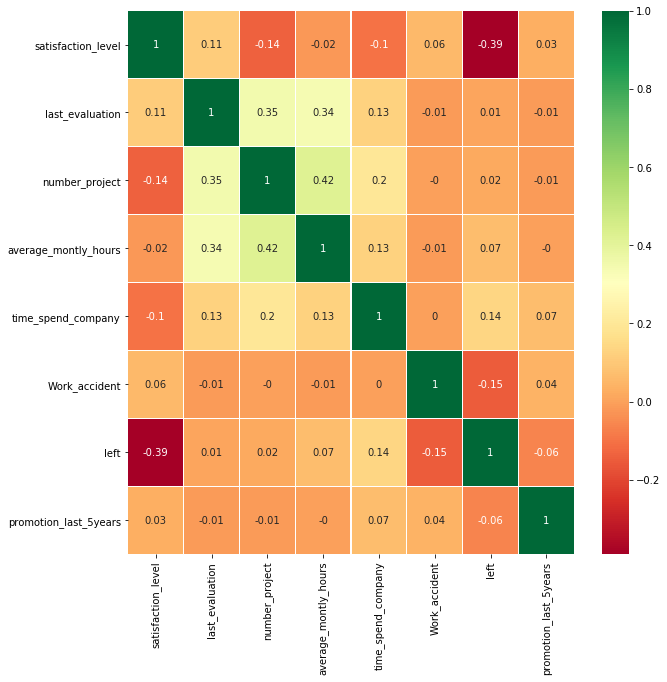

In [14]:
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,10)
plt.show()

**Вывод:** Как видно по матрице корреляций, сильной линейной связи между атрибутами нет. Но атрибут 
average_montly_hours (средние часы в месяц) имеет слабую прямую зависимость с атрибутом number_project (номер проекта) с коэффициентом корреяции 0,42 и атрибут left(увольнение) имеет слабую обратную зависимость с атрибутом satisfaction_level(уровень удовлетворенности) с коэффициентом корреляции -0,39. Обьяснимть связь средних часов работы в месяц и номера проекта сложно, скорее всего это независимые величины и простое сопвпадение. А вот связь столбца увольнение, который принимает два значения: 0, если сотрудник работает и 1 если он уволен, с уровнем удовлетворенности можно, то есть чем выше значения уровня удовлетворенности сотрудника, тем меньше значение столбца left и оно ровно 0, то есть сотрудник работает в компании, а сотрудник с низким уровнем удовлетворенности - уволен.

## 4. Визуализировать несколько взаимосвязей между переменными

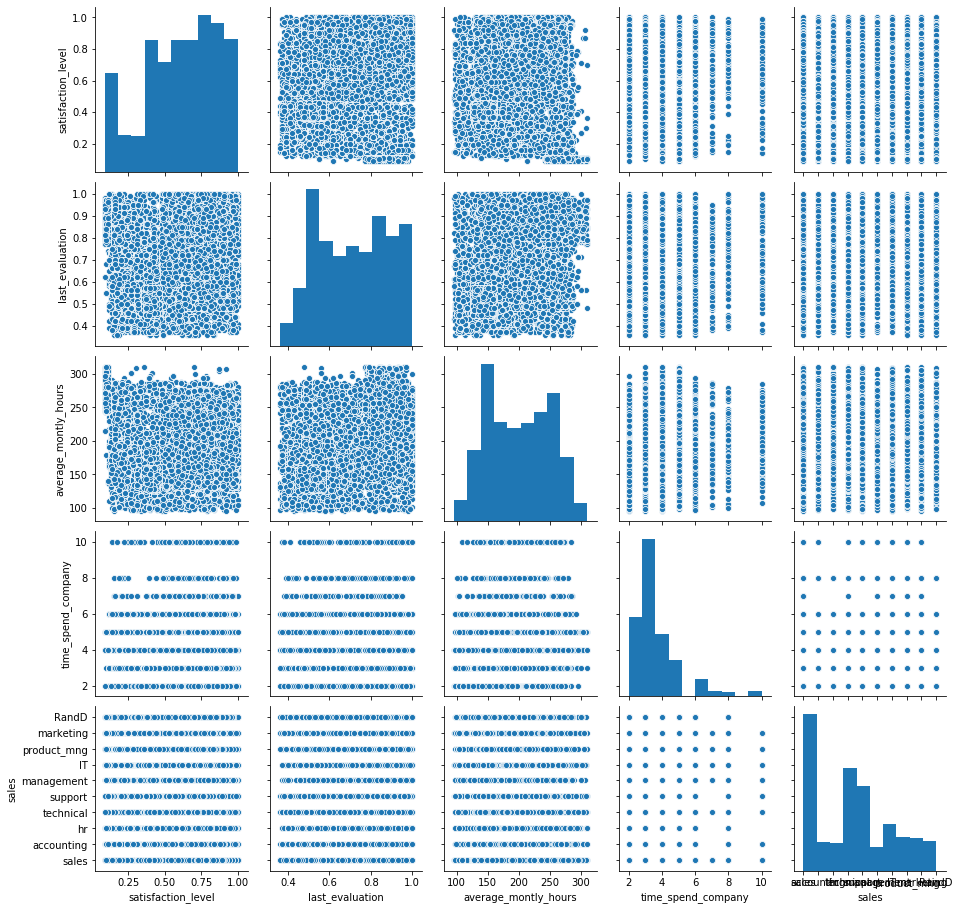

In [15]:
sns.pairplot(df_hr, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'sales'], kind="scatter")

In [16]:
#Посмотрим на распределение среднего стажа работы в рамках разных отеделов
top_department = df_hr.groupby('sales').mean().sort_values('time_spend_company', ascending=False).reset_index()
top_department[['sales', 'time_spend_company']]

,sales,time_spend_company
0,management,4.303175
1,marketing,3.569930
2,sales,3.534058
3,accounting,3.522816
4,product_mng,3.475610
5,IT,3.468623
6,technical,3.411397
7,support,3.393001
8,RandD,3.367217
9,hr,3.355886


Text(0.5, 1.0, 'Распределение отделов по среднему стажу работы')

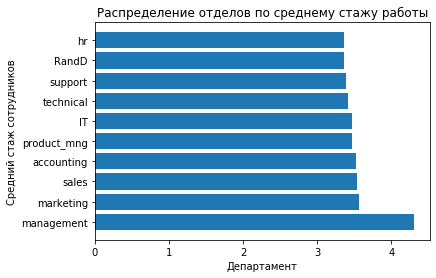

In [17]:
#Постоим столбчатую диаграмму распределения
plt.barh(top_department['sales'], top_department['time_spend_company'])
plt.xlabel('Департамент')
plt.ylabel('Средний стаж сотрудников')
plt.title('Распределение отделов по среднему стажу работы')

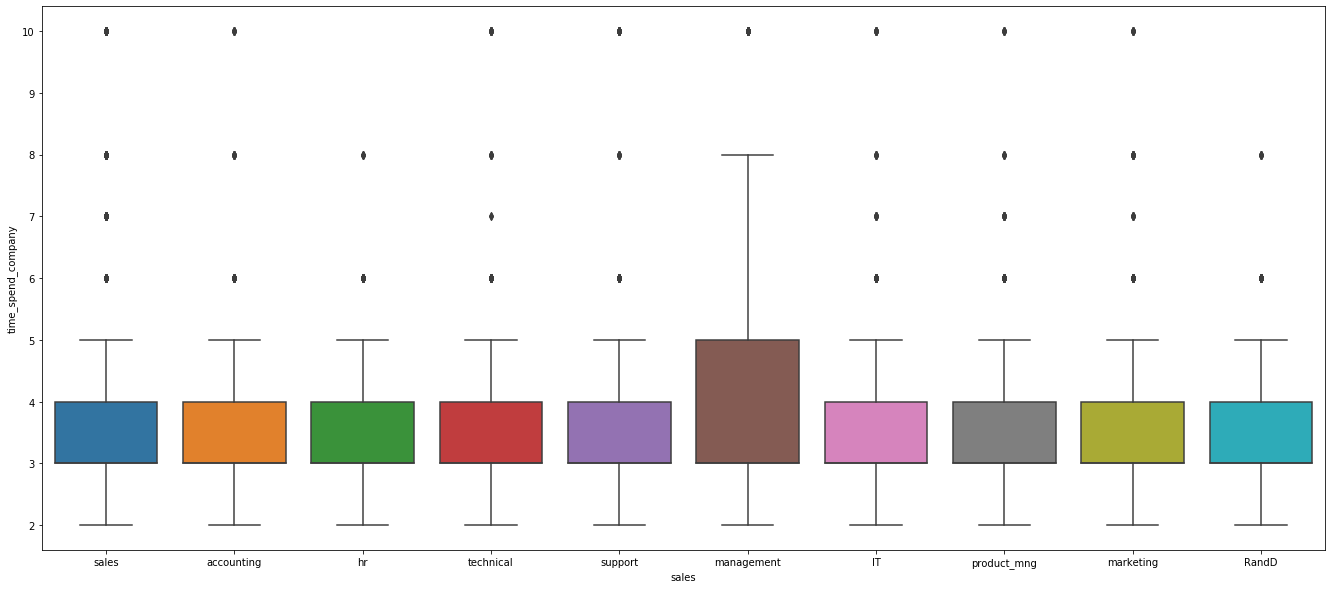

In [18]:
#Постоим boxplot этого же распределения
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="sales", y="time_spend_company", data=df_hr)

**Вывод:** по графикам видно, что самый большой стаж работы в депаратменте management. В среднем сотрудники работают в компании от 3 до 4 лет. Также в данных есть выбросы, которые находятся в промежутке от 6 до 10 лет для разных депаратментов. 

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [19]:
#H0 - нет статистических  различий между отработанными часами в месяц у сотрудников с повышение и без
#H1 - есть статистические  различия между отработанными часами в месяц у сотрудников с повышение и без
avg_hours_no_promotion = df_hr[df_hr['promotion_last_5years'] == 0]['average_montly_hours']
avg_hours_promotion = df_hr[df_hr['promotion_last_5years'] == 1]['average_montly_hours']

t, p_value = stats.ttest_ind(avg_hours_no_promotion, avg_hours_promotion)
print('t=%.3f, p_value=%.3f' % (t, p_value))

t=0.434, p_value=0.664


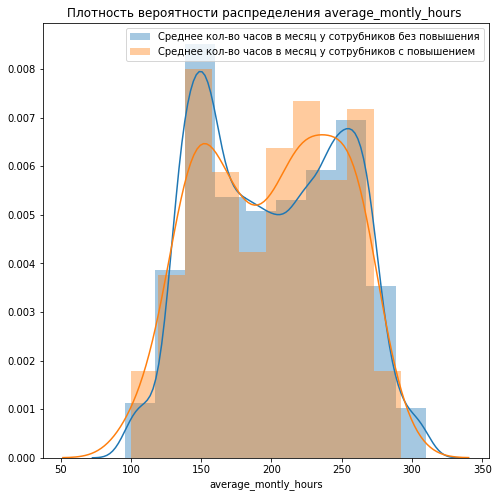

In [22]:
sns.distplot(avg_hours_no_promotion, 10)
sns.distplot(avg_hours_promotion, 10)
plt.title('Плотность вероятности распределения average_montly_hours ')
plt.legend(['Среднее кол-во часов в месяц у сотрубников без повышения', 'Среднее кол-во часов в месяц у сотрубников с повышением'])
plt.rcParams['figure.figsize']=8,8
plt.show()

**Вывод:** p-value равно 0.66, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что нет статистически значимой разницы между средними часами в месяц у сотрудников, которых повышали за последние 5 лет, у тех сотрудников, кого не повышали.

In [23]:
last_evaluation_low = df_hr[df_hr['salary'] == 'low']['last_evaluation']
last_evaluation_high = df_hr[df_hr['salary'] == 'high']['last_evaluation']

t1, p_value1 = stats.ttest_ind(last_evaluation_low, last_evaluation_high)
print('t=%.3f, p_value=%.3f' % (t1, p_value1))

t=2.411, p_value=0.016


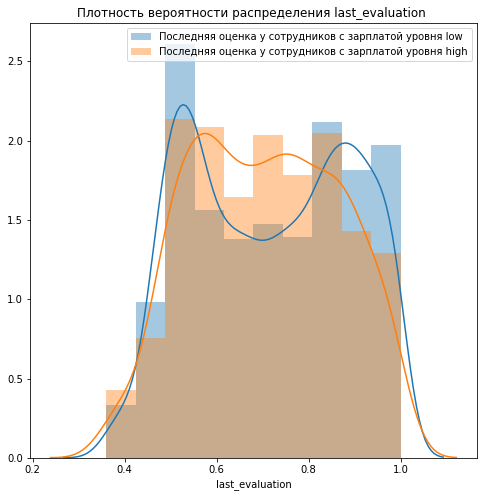

In [24]:
sns.distplot(last_evaluation_low, 10)
sns.distplot(last_evaluation_high, 10)
plt.title('Плотность вероятности распределения last_evaluation ')
plt.legend(['Последняя оценка у сотрудников с зарплатой уровня low', 'Последняя оценка у сотрудников с зарплатой уровня high'])
plt.rcParams['figure.figsize']=8,8
plt.show()

**Вывод:** p-value равно 0.016, что меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что есть значительные статистические различия между последней оценкой сотрудников с высокой и низкой зарплатой. По графику видно, что у сотрудникой с зарплатой типа high средние оценки выше, чем у сотрудников с зарплатой типа low.

## 6. Рассчитать сколько работников работает в каждом департаменте

In [25]:
#Выберем только тех сотрудников, кто сейчас работает, сгруппируем по департаменту, подсчитаем кол-во и отсортируем по убыванию
sales_info = df_hr[(df_hr['left']==0)][['sales', 'satisfaction_level']].groupby('sales').count().sort_values('satisfaction_level', ascending=False).reset_index()
sales_info.columns = ['sales', 'number_of_employees']
sales_info

,sales,number_of_employees
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


**Вывод:** Самый большой департамент sales в нем работают 3126 человек, а в департаментах accounting, management и hr работают по 563, 539 и 524 сотрудника соответственно, это самые небольшие департаменты.

## 7. Показать распределение сотрудников по зарплатам

In [26]:
#Уникальные значения в столбце salary
df_hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Сотрудников с низкой зарплатой: 7316 49 %
Сотрудников с средней зарплатой: 6446 43 %
Сотрудников с высокой зарплатой: 1237 8 %


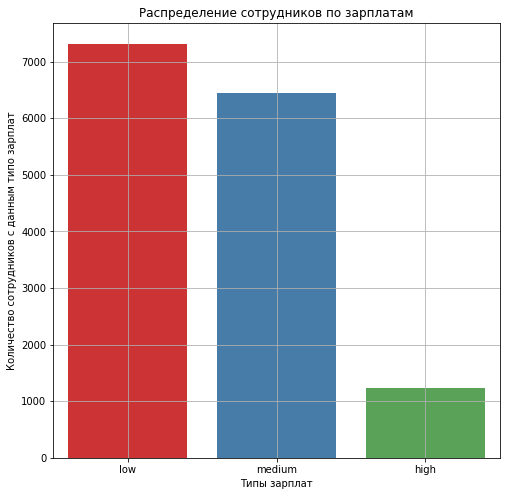

In [27]:
salary = df_hr['salary']
salary_low = df_hr[df_hr['salary']=='low']
salary_medium = df_hr[df_hr['salary']=='medium']
salary_high = df_hr[df_hr['salary']=='high']

print('Сотрудников с низкой зарплатой:', len(salary_low), round(len(salary_low)/len(salary)*100), '%')
print('Сотрудников с средней зарплатой:', len(salary_medium), round(len(salary_medium)/len(salary)*100), '%')
print('Сотрудников с высокой зарплатой:', len(salary_high), round(len(salary_high)/len(salary)*100), '%')

sns.countplot(x='salary', data=df_hr, palette='Set1')
plt.xlabel('Типы зарплат')
plt.ylabel('Количество сотрудников с данным типо зарплат')
plt.title('Распределение сотрудников по зарплатам')
plt.rcParams['figure.figsize']= 8, 8
plt.grid(True)
plt.show()

**Вывод:** Больше всего в компании сотрудников с зарплатой типа 'low' - низкий, почти 50 % от общего числа сотрудников, чуть меньше сотрудников с зарплатой типа 'medium' - средний, 43%, и оставшиеся 8 % сотрудников с зарплатой типа 'high' - высокий.

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами

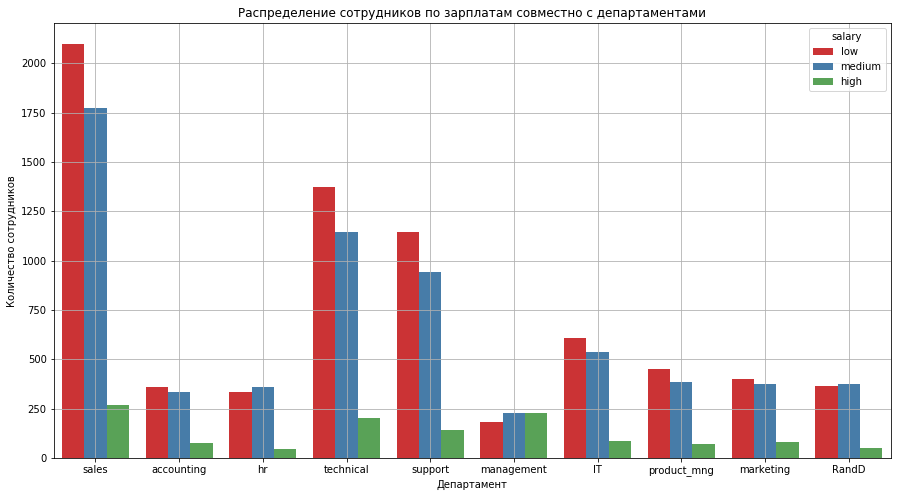

In [29]:
sns.countplot(x='sales', hue='salary', data=df_hr, palette='Set1')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами')
plt.rcParams['figure.figsize']= 15, 8
plt.grid(True)
plt.show()

**Вывод:** По графику видно, что для большинсва департаментов справедливо утверждение, что больше всего сотрудников с зарплатой типа 'low', потом идут сотрудники с зарплатой типа 'medium', а меньше всего сотрудников с зарплатой типа 'high', кроме hr(сотрудников со средней зарплатой больше чем сотрудников с низкой), management(сотрудников со средней и высокой зарплатой большем, чем с низкой) и RandD(сотрудников с средней зарплатой чуть больше чем сотрудников с низкой).

## 9. Сколько сотрудников покинули компанию

In [30]:
print(len(df_hr[df_hr['left']==1]), 'сотрудников покинуло компанию')

3571 сотрудников покинуло компанию


## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Уровень удовлетворенности у сотрудников, которые работают, такой же как у тех, кто уволен?

In [32]:
#H0 - нет статистических  различий между выборками
#H1 - есть статистические  различия между выборками

satisfaction_level_left = df_hr[df_hr['left'] == 1]['satisfaction_level']
satisfaction_level_work = df_hr[df_hr['left'] == 0]['satisfaction_level']
t, p_value = stats.ttest_ind(satisfaction_level_left, satisfaction_level_work)
print('t=%.3f, p_value=%.3f' % (t, p_value))
if p_value > 0.05:
    print('нет статистических  различий между выборками')
else:
    print('есть статистические  различия между выборками')

t=-51.613, p_value=0.000
есть статистические  различия между выборками


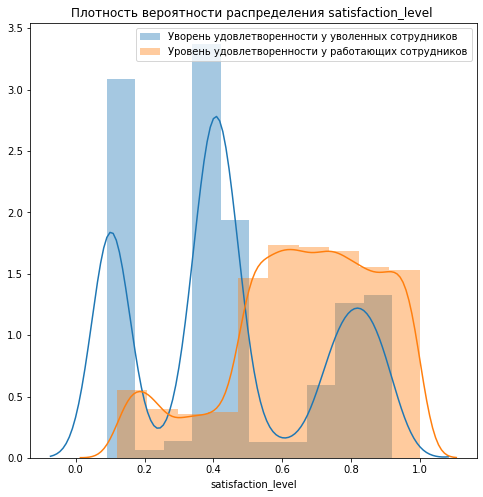

In [34]:
sns.distplot(satisfaction_level_left, 10)
sns.distplot(satisfaction_level_work, 10)
plt.title('Плотность вероятности распределения satisfaction_level ')
plt.legend(['Уворень удовлетворенности у уволенных сотрудников', 'Уровень удовлетворенности у работающих сотрудников'])
plt.rcParams['figure.figsize']=8,8
plt.show()

**Вывод:** p-value равно 0.00, что меньше стандартной альфа ошибки 0.05, поэтому мы отвераем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетвоенности, тех, кто уже уволен и тех, кто работает.
На графике видно, что у уволенных сотрудников низнакая оценка уровня удовлетворенности встречается чаще, чем у тех, кто работает.
**Таким образом, сотрудники уходят потому что неудовлетворены местом работы.**

### Посленяя оценка сотрудника имеет зависимость с тем, работает или нет сотрудник?

In [35]:
#H0: два образца независимы
#H1: существует зависимость между образцами

from scipy.stats import spearmanr

stat, p = spearmanr(df_hr['left'], df_hr['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('два образца независимы')
else:
    print('существует зависимость между образцами')

stat=-0.002, p=0.765
два образца независимы


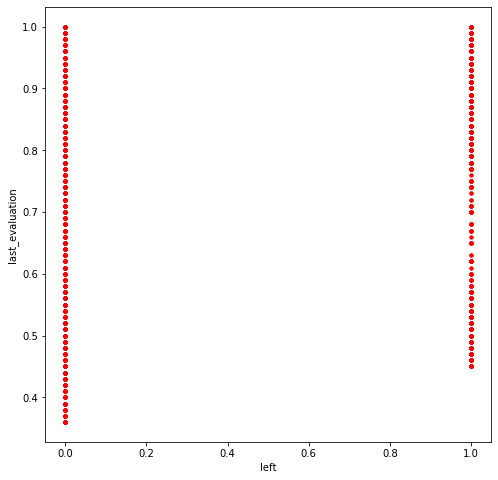

In [36]:
plt.plot(df_hr['left'], df_hr['last_evaluation'], 'r.')
plt.xlabel('left')
plt.ylabel('last_evaluation')
plt.show()

**Вывод:** p-value равно 0.75, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что последняя оценка не зависит от того, рабоате или нет сотрудник сейчас. На графике видно, что у сотруднико, кто уволен, нет очень низких оценок.
**Таким образом, последняя оценка не является основной причиной увольнения сотрудников.**

### Есть ли различия по статусу сотрудника (уволен/работает) с разным типом зарплаты?

In [37]:
# H0: нет различий у групп
# H1: есть различий у групп
restecg_0 = df_hr[df_hr['salary']=='low']['left']
restecg_1 = df_hr[df_hr['salary']=='medium']['left']
restecg_2 = df_hr[df_hr['salary']=='high']['left']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

In [38]:
print('Доля сотрудников, которые уволились с зарплатой типа low:', round((sum(restecg_0)/len(restecg_0)*100)),'%')
print('Доля сотрудников, которые уволились с зарплатой типа medium:', round((sum(restecg_1)/len(restecg_1)*100)),'%')
print('Доля сотрудников, которые уволились с зарплатой типа high:', round((sum(restecg_2)/len(restecg_2)*100)),'%')

Доля сотрудников, которые уволились с зарплатой типа low: 30 %
Доля сотрудников, которые уволились с зарплатой типа medium: 20 %
Доля сотрудников, которые уволились с зарплатой типа high: 7 %


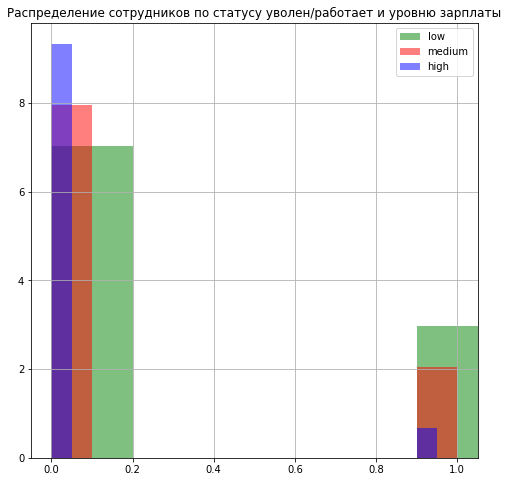

In [41]:
plt.hist(restecg_0,alpha=0.5, density=True, color='g', width = 0.2)
plt.hist(restecg_1, alpha=0.5, density=True, color='r', width = 0.1)
plt.hist(restecg_2, alpha=0.5, density=True, color='b', width = 0.05)
plt.title('Распределение сотрудников по статусу уволен/работает и уровню зарплаты')
plt.legend(['low', 'medium', 'high'])
plt.grid(True)
plt.rcParams['figure.figsize']=8,8
plt.show()

**Вывод:** Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп c разным типо зарплаты, то есть в группах сотрудников с зарплатой типа low, medium и high есть различия. По графику видно, что наибольшая текучесть кадров у сотрудников с маленькой зарплатой. **Таким образом, большинство сотрудников увольняется из за маленькой зарплаты.**

**После проверки нескольких гипотез, мы можем сделать вывод, что компании надо пересмотреть условия работы (показатели, которые учитываются в подсчете уровня удовлетвоенности) и заработную плату сотрудников, чтобы сократить текучесть кадров.**